# Data Splitting

In [49]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Documents\Projects\Machine Learning\Datathon\LAPTOP MODEL\DATASETFINAL.csv")

df.head()

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nadhi\AppData\Local\Temp\ipykernel_29692\3407294896.py:6: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Documents\Projects\Machine Learning\Datathon\LAPTOP MODEL\DATASETFINAL.csv")


,no,Brand,CPU,GPU,RAM Type,RAM Size,Storage,Screen Type,Refresh Rate,Uniqueness,Upgradeable,price,points,worth
0,1,ACER,8531,NaN,DDR5,8,512,IPS,60,0,1,5054831,9990,well-priced
1,2,ASUS,8657,NaN,DDR5,16,256,IPS,60,0,1,5099000,10013,well-priced
2,3,HP,8657,NaN,DDR4,16,512,IPS,60,0,1,5139000,9673,well-priced
3,4,LENOVO,8657,NaN,DDR5,8,256,IPS,60,0,0,5199000,7589,well-priced
4,5,ACER,5491,NaN,DDR4,8,512,IPS,60,0,1,5229000,7268,well-priced


In [50]:
X = pd.get_dummies(df.drop(["points", "worth"], axis=1))
y = df["worth"]

X = X.fillna(0)



In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(),MLPClassifier())

model.fit(X_train, y_train)

d:\Documents\Projects\Machine Learning\Datathon\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,steps,"[('standardscaler', ...), ('mlpclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001


In [53]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
labels_name=["excellent","good","overpriced", "slight overprice", "well-priced" ]


# Validation Score

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_train, y_train_pred, labels=labels_name)
sc = accuracy_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred, average='weighted')


print(classification_report(y_train, y_train_pred))

print(f"SC: {sc} \n" )

print(cm)

                  precision    recall  f1-score   support

       excellent       1.00      0.60      0.75         5
            good       0.94      0.74      0.83        23
      overpriced       0.97      1.00      0.98       703
slight overprice       0.83      0.57      0.68        75
     well-priced       0.84      0.93      0.88        94

        accuracy                           0.95       900
       macro avg       0.92      0.77      0.82       900
    weighted avg       0.94      0.95      0.94       900

SC: 0.9455555555555556 

[[  3   0   0   1   1]
 [  0  17   0   1   5]
 [  0   0 701   0   2]
 [  0   1  22  43   9]
 [  0   0   0   7  87]]


## Data Visualize

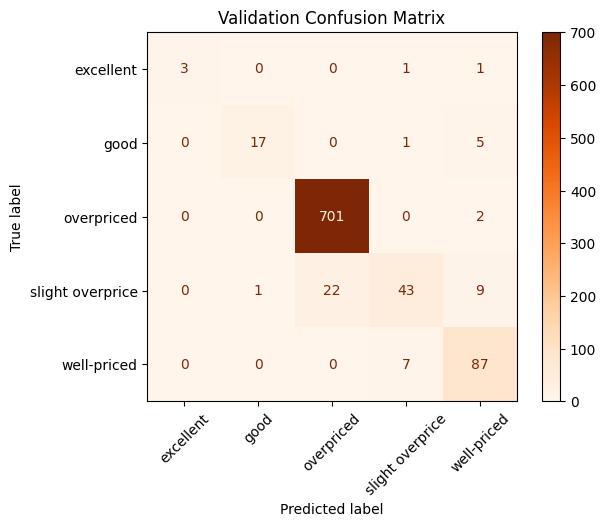

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_name)
disp.plot(cmap='Oranges', xticks_rotation=45)

plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.show()

# Real Test 


In [56]:



cm = confusion_matrix(y_test, y_test_pred, labels=labels_name)
sc = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))





print(f"SC: {sc} \n" )

print(cm)



                  precision    recall  f1-score   support

            good       0.17      0.25      0.20         4
      overpriced       0.95      0.98      0.97       178
slight overprice       0.47      0.38      0.42        21
     well-priced       0.68      0.57      0.62        23

        accuracy                           0.87       226
       macro avg       0.57      0.54      0.55       226
    weighted avg       0.87      0.87      0.87       226

SC: 0.8716814159292036 

[[  0   0   0   0   0]
 [  0   1   0   1   2]
 [  0   1 175   2   0]
 [  0   0   9   8   4]
 [  0   4   0   6  13]]


## Data Visualize


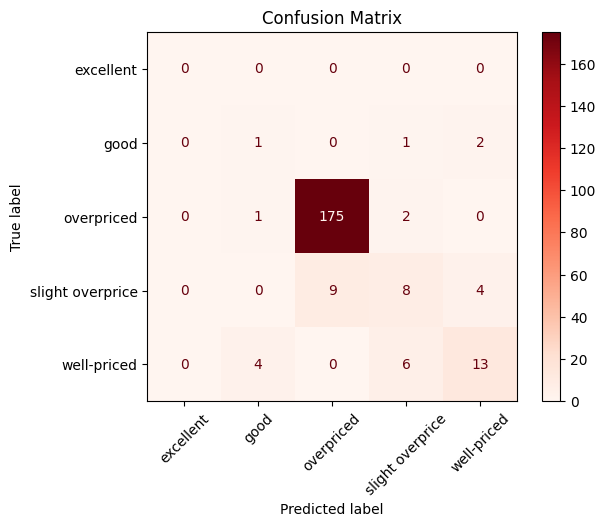

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_name)
disp.plot(cmap='Reds', xticks_rotation=45)

plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [58]:
#import pickle

#with open ('SGDRegression.pkl', 'wb') as files:
    #pickle.dump(model,files)